In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
plt.style.use("seaborn-pastel")
from sklearn import preprocessing
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.width', 500)
pd.set_option('display.max_rows', 200)
import warnings
warnings.filterwarnings("ignore")

In [8]:
df=pd.read_csv('movies.csv')
df.head()

,Unnamed: 0,TCONST,ORIGINAL_TITLE,TYPE,AVG_RATING,VOTE_COUNT,POPULARITY,GENRES,OVERVIEW,DIRECTORS,IS_ADULT,YEAR,TIME_MINUTES,POSTER_PATH
0,0,tt0000001,Carmencita,short,5.700,2063,1.273,"Documentary,Short",The first woman to appear in front of an Ediso...,William K.L. Dickson,0,1894,1,/6QJowxF4f2hrUtmrDXOqbRDMdDH.jpg
1,1,tt0000005,Blacksmith Scene,short,6.200,2799,1.062,"Comedy,Short",Three men hammer on an anvil and pass a bottle...,William K.L. Dickson,0,1893,1,/6nh4gdZ4cWQbnXDicWIGsOZiZsx.jpg
2,2,tt0000006,Chinese Opium Den,short,5.100,190,NaN,Short,NaN,William K.L. Dickson,0,1894,1,NaN
3,3,tt0000008,Edison Kinetoscopic Record of a Sneeze,short,5.400,2212,0.312,"Documentary,Short",A man (Thomas Edison's assistant) takes a pinc...,William K.L. Dickson,0,1894,1,/utsYe7NaVdiUhXpBwgln3LTucYs.jpg
4,4,tt0177707,Dickson Experimental Sound Film,short,6.700,2589,0.494,"Music,Short",William K.L. Dickson plays the violin while tw...,William K.L. Dickson,0,1894,1,/tuoxqF0sgVpWbVGMPaokmlBwDxw.jpg


In [9]:
#df['IS_ADULT'].value_counts()
df=df[df['IS_ADULT']!=1]

In [10]:
df=df.drop(columns=['Unnamed: 0', 'POPULARITY', 'OVERVIEW', 'POSTER_PATH', 'IS_ADULT'])

In [11]:
df.head()

,TCONST,ORIGINAL_TITLE,TYPE,AVG_RATING,VOTE_COUNT,GENRES,DIRECTORS,YEAR,TIME_MINUTES
0,tt0000001,Carmencita,short,5.700,2063,"Documentary,Short",William K.L. Dickson,1894,1
1,tt0000005,Blacksmith Scene,short,6.200,2799,"Comedy,Short",William K.L. Dickson,1893,1
2,tt0000006,Chinese Opium Den,short,5.100,190,Short,William K.L. Dickson,1894,1
3,tt0000008,Edison Kinetoscopic Record of a Sneeze,short,5.400,2212,"Documentary,Short",William K.L. Dickson,1894,1
4,tt0177707,Dickson Experimental Sound Film,short,6.700,2589,"Music,Short",William K.L. Dickson,1894,1


In [12]:
def check_detail(dataframe):
    d = {'SHAPE': dataframe.shape,
        'COLUMNS': dataframe.columns,
        'INDEX': dataframe.index,
        'VALUE TYPES': dataframe.dtypes,
        'DUPLICATED VALUES': dataframe.duplicated().sum(),
        'NUMBER OF UNIQUE VALUES': dataframe.nunique(),
        'ANY MISSING VALUES': dataframe.isnull().values.any(),
        'MISSING VALUES': dataframe.isnull().sum(),
        'DESCRIBE.T': dataframe.describe([0, 0.05, 0.50, 0.95, 0.99, 1]).T}
    hashtags = '---------------------------'
    for key, val in d.items():
        print(f'{hashtags} {key} {hashtags}')
        print(val)
    print(f'{hashtags} {"LIST END"} {hashtags}')
   

check_detail(dataframe=df)

--------------------------- SHAPE ---------------------------
(250079, 9)
--------------------------- COLUMNS ---------------------------
Index(['TCONST', 'ORIGINAL_TITLE', 'TYPE', 'AVG_RATING', 'VOTE_COUNT', 'GENRES', 'DIRECTORS', 'YEAR', 'TIME_MINUTES'], dtype='object')
--------------------------- INDEX ---------------------------
Int64Index([     0,      1,      2,      3,      4,      5,      6,      7,      8,      9,
            ...
            252002, 252003, 252004, 252005, 252006, 252007, 252008, 252009, 252010, 252011], dtype='int64', length=250079)
--------------------------- VALUE TYPES ---------------------------
TCONST             object
ORIGINAL_TITLE     object
TYPE               object
AVG_RATING        float64
VOTE_COUNT          int64
GENRES             object
DIRECTORS          object
YEAR               object
TIME_MINUTES       object
dtype: object
--------------------------- DUPLICATED VALUES ---------------------------
22
--------------------------- NUMBER OF UNI

In [13]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtype == 'O']  # Categorical columns
    num_but_cat = [col for col in dataframe.columns if
                   dataframe[col].nunique() < cat_th and dataframe[col].dtype != 'O']  # Numeric but categorical
    cat_but_car = [col for col in dataframe.columns if
                   dataframe[col].nunique() > car_th and dataframe[col].dtype == 'O']  # Categorical but cardinal
    cat_cols += num_but_cat  # Combine categorical columns
    cat_cols = [col for col in cat_cols if col not in cat_but_car]  # Exclude cardinal columns from categorical columns

    num_cols = [col for col in dataframe.columns if dataframe[col].dtype != 'O']  # Numerical columns
    num_cols = [col for col in num_cols if col not in num_but_cat]  # Exclude numeric-looking categories

    print(f'Observations: {dataframe.shape[0]}')
    print(f'Variables: {dataframe.shape[1]}')
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')

    return cat_cols, num_cols, cat_but_car

In [14]:
def identify_check(dataframe):
    print('-' * 80)
    print(f'Categorical : {cat_cols}')
    print('-' * 80)
    print(f'Numerical : {num_cols}')
    print('-' * 80)
    print(f'Categorical but Cardinal : {cat_but_car}')

cat_cols, num_cols, cat_but_car = grab_col_names(df)
identify_check(df)

Observations: 250079
Variables: 9
cat_cols: 1
num_cols: 2
cat_but_car: 6
num_but_cat: 0
--------------------------------------------------------------------------------
Categorical : ['TYPE']
--------------------------------------------------------------------------------
Numerical : ['AVG_RATING', 'VOTE_COUNT']
--------------------------------------------------------------------------------
Categorical but Cardinal : ['TCONST', 'ORIGINAL_TITLE', 'GENRES', 'DIRECTORS', 'YEAR', 'TIME_MINUTES']


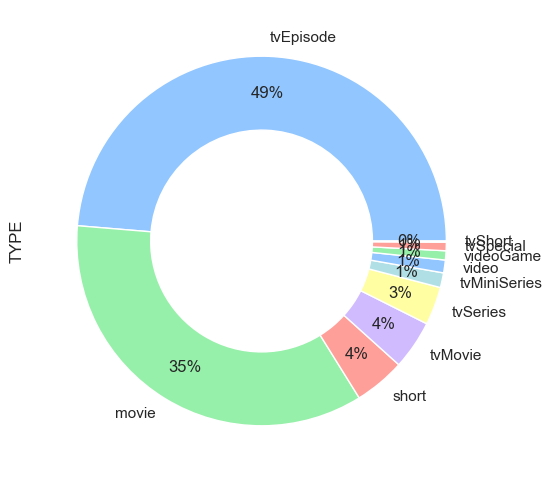

In [15]:
df.TYPE.value_counts().plot.pie(autopct="%.0f%%",figsize=(6,6),pctdistance=0.8,
                                                 wedgeprops=dict(width=0.4))
plt.show()

In [16]:
df.replace('\\N', np.nan, inplace=True)

In [17]:
df.isnull().sum()

TCONST                0
ORIGINAL_TITLE        0
TYPE                  0
AVG_RATING            0
VOTE_COUNT            0
GENRES              264
DIRECTORS             0
YEAR                 11
TIME_MINUTES      20902
dtype: int64

In [18]:
df.dropna(inplace=True)

In [19]:
def check_detail(dataframe):
    d = {'SHAPE': dataframe.shape,
        'COLUMNS': dataframe.columns,
        'INDEX': dataframe.index,
        'VALUE TYPES': dataframe.dtypes,
        'DUPLICATED VALUES': dataframe.duplicated().sum(),
        'NUMBER OF UNIQUE VALUES': dataframe.nunique(),
        'ANY MISSING VALUES': dataframe.isnull().values.any(),
        'MISSING VALUES': dataframe.isnull().sum(),
        'DESCRIBE.T': dataframe.describe([0, 0.05, 0.50, 0.95, 0.99, 1]).T}
    hashtags = '---------------------------'
    for key, val in d.items():
        print(f'{hashtags} {key} {hashtags}')
        print(val)
    print(f'{hashtags} {"LIST END"} {hashtags}')
   

check_detail(dataframe=df)


--------------------------- SHAPE ---------------------------
(228993, 9)
--------------------------- COLUMNS ---------------------------
Index(['TCONST', 'ORIGINAL_TITLE', 'TYPE', 'AVG_RATING', 'VOTE_COUNT', 'GENRES', 'DIRECTORS', 'YEAR', 'TIME_MINUTES'], dtype='object')
--------------------------- INDEX ---------------------------
Int64Index([     0,      1,      2,      3,      4,      5,      6,      8,      9,     10,
            ...
            252000, 252001, 252002, 252003, 252004, 252005, 252006, 252007, 252008, 252009], dtype='int64', length=228993)
--------------------------- VALUE TYPES ---------------------------
TCONST             object
ORIGINAL_TITLE     object
TYPE               object
AVG_RATING        float64
VOTE_COUNT          int64
GENRES             object
DIRECTORS          object
YEAR               object
TIME_MINUTES       object
dtype: object
--------------------------- DUPLICATED VALUES ---------------------------
22
--------------------------- NUMBER OF UNI

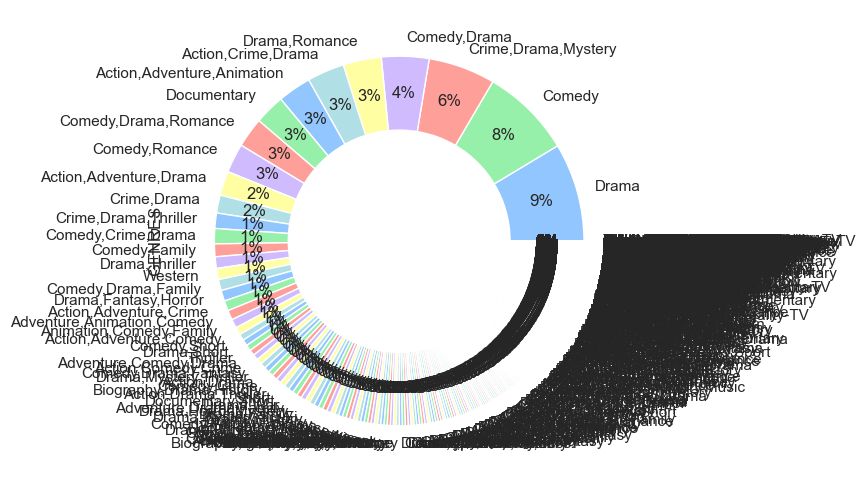

In [20]:
df.GENRES.value_counts().plot.pie(autopct="%.0f%%",figsize=(6,6),pctdistance=0.8,
                                              wedgeprops=dict(width=0.4))
plt.show()

In [21]:
from sklearn.feature_extraction.text import CountVectorizer
temp = df.GENRES.dropna()
vec = CountVectorizer(token_pattern='(?u)\\b[\\w-]+\\b', analyzer='word').fit(temp)
bag_of_genres = vec.transform(temp)
unique_genres =  vec.get_feature_names()
np.array(unique_genres)

array(['action', 'adult', 'adventure', 'animation', 'biography', 'comedy',
       'crime', 'documentary', 'drama', 'family', 'fantasy', 'film-noir',
       'game-show', 'history', 'horror', 'music', 'musical', 'mystery',
       'news', 'reality-tv', 'romance', 'sci-fi', 'short', 'sport',
       'talk-show', 'thriller', 'war', 'western'], dtype='<U11')

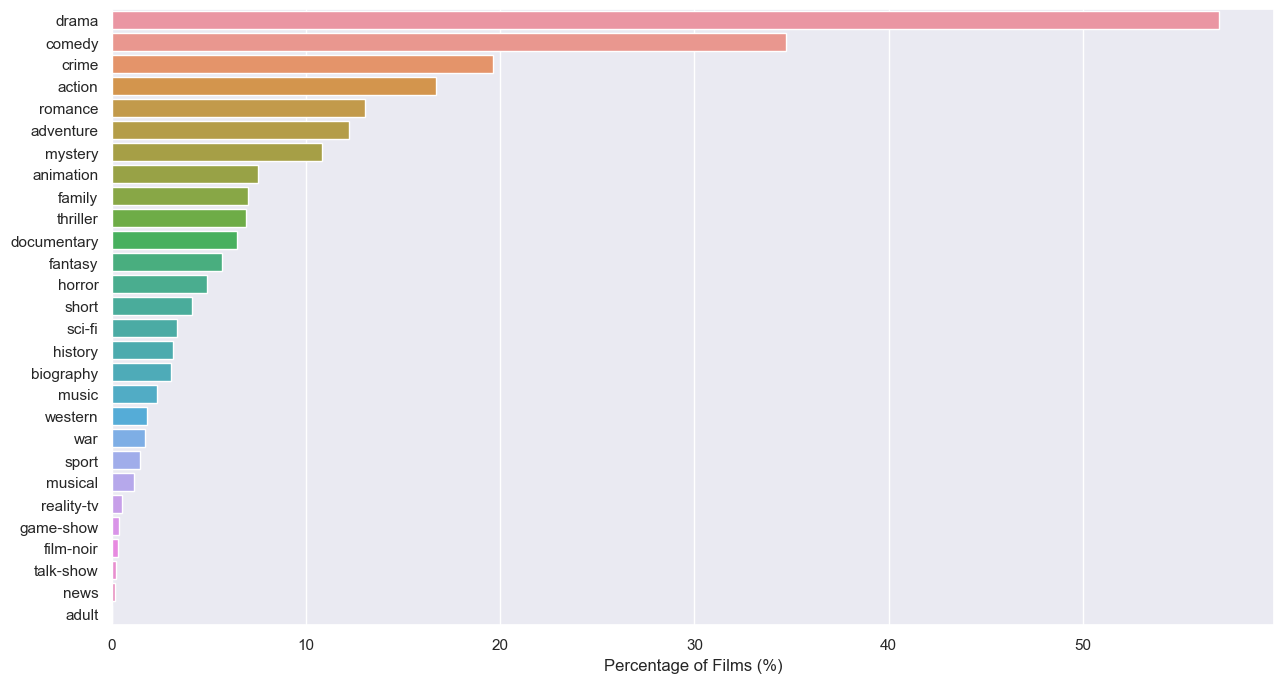

In [22]:
GENRES = pd.DataFrame(bag_of_genres.todense(),columns=unique_genres,index=temp.index)
sorted_genres_perc = 100*pd.Series(GENRES.sum()).sort_values(ascending=False)/GENRES.shape[0]
plt.figure(figsize=(15,8))
sns.barplot(x=sorted_genres_perc.values,y=sorted_genres_perc.index,orient="h")
plt.xlabel("Percentage of Films (%)")
plt.show()

In [23]:
df['combined_features'] = df['ORIGINAL_TITLE'] + ' ' + df['GENRES'] + ' ' + df['DIRECTORS']
# Replace periods (.) with empty strings and commas (,) with spaces
df['combined_features'] = df['combined_features'].str.replace('.', '', regex=False)
df['combined_features'] = df['combined_features'].str.replace(',', ' ', regex=False)
df['combined_features'] = df['combined_features'].str.lower()
df.head()

,TCONST,ORIGINAL_TITLE,TYPE,AVG_RATING,VOTE_COUNT,GENRES,DIRECTORS,YEAR,TIME_MINUTES,combined_features
0,tt0000001,Carmencita,short,5.700,2063,"Documentary,Short",William K.L. Dickson,1894,1,carmencita documentary short william kl dickson
1,tt0000005,Blacksmith Scene,short,6.200,2799,"Comedy,Short",William K.L. Dickson,1893,1,blacksmith scene comedy short william kl dickson
2,tt0000006,Chinese Opium Den,short,5.100,190,Short,William K.L. Dickson,1894,1,chinese opium den short william kl dickson
3,tt0000008,Edison Kinetoscopic Record of a Sneeze,short,5.400,2212,"Documentary,Short",William K.L. Dickson,1894,1,edison kinetoscopic record of a sneeze documen...
4,tt0177707,Dickson Experimental Sound Film,short,6.700,2589,"Music,Short",William K.L. Dickson,1894,1,dickson experimental sound film music short wi...


In [24]:
df = df[(df['VOTE_COUNT'] > 2000) & (df['TYPE'] == 'movie')]

In [26]:
df = df.reset_index(drop=True)
df.shape

(23729, 10)

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [28]:
df["combined_features"].head()

0    the birth of a nation drama history war dw gri...
1    intolerance: love's struggle throughout the ag...
2    broken blossoms or the yellow man and the girl...
3    true heart susie comedy drama romance dw griffith
4              way down east drama romance dw griffith
Name: combined_features, dtype: object

In [29]:
tfidf = TfidfVectorizer()

tfidf_matrix = tfidf.fit_transform(df['combined_features'])

In [30]:
tfidf_matrix.shape

(23729, 29954)

In [31]:
tfidf.get_feature_names()

['000',
 '007',
 '03',
 '10',
 '100',
 '1000',
 '10000',
 '101',
 '102',
 '1080',
 '109',
 '10th',
 '10x10',
 '11',
 '110th',
 '1138',
 '116',
 '117',
 '11m',
 '12',
 '120',
 '122',
 '123',
 '127',
 '12th',
 '13',
 '13b',
 '13e',
 '13th',
 '14',
 '140',
 '1408',
 '143',
 '1453',
 '1492',
 '15',
 '150',
 '16',
 '1600',
 '1612',
 '1666',
 '17',
 '174',
 '1776',
 '18',
 '180',
 '182',
 '1890',
 '1898',
 '18am',
 '19',
 '1915',
 '1917',
 '1918',
 '1920',
 '1921',
 '1922',
 '1933',
 '1934',
 '1935',
 '1940',
 '1941',
 '1942',
 '1944',
 '1945',
 '1964',
 '1967',
 '1969',
 '1970',
 '1971',
 '1972',
 '1975',
 '1978',
 '1981',
 '1983',
 '1984',
 '1985',
 '1987',
 '1988',
 '1990',
 '1993',
 '1994',
 '1996',
 '1999',
 '1br',
 '1bu',
 '20',
 '200',
 '2000',
 '20000',
 '2001',
 '2010',
 '2012',
 '2013',
 '2018',
 '2019',
 '2020',
 '2046',
 '2049',
 '2077',
 '20segi',
 '20th',
 '21',
 '211',
 '212',
 '2150',
 '216',
 '22',
 '23',
 '237',
 '24',
 '24th',
 '25',
 '25th',
 '26',
 '27',
 '28',
 '2898',


In [32]:
tfidf_matrix.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [33]:
cosine_sim = cosine_similarity(tfidf_matrix,
                               tfidf_matrix)

In [34]:
cosine_sim.shape
cosine_sim[1]

array([0.38226647, 1.        , 0.29180348, ..., 0.00440331, 0.        ,
       0.        ])

In [36]:
# Benzerliklere gore onerilerin yapilmasi
indices = pd.Series(df.index, index=df['ORIGINAL_TITLE'])

# Ayni isimdekileri sil sadece sonuncusunu birak
indices = indices[~indices.index.duplicated(keep='last')]

movie_index = indices['Se7en']

In [37]:
def get_similar_movies(movie_index, cosine_sim, df, top_n=5):
    if 0 <= movie_index < len(cosine_sim):
        similarity_scores = list(enumerate(cosine_sim[movie_index]))
        similarity_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)
        movie_indices = [i for i, _ in similarity_scores[1:top_n+1]]  # Exclude the movie itself
        return df.iloc[movie_indices]
    else:
        return f"Index {movie_index} is out of bounds."

In [38]:
movie_index = indices['Se7en'] # Replace with the index of the movie you want to find similarities for
similar_movies_df = get_similar_movies(movie_index, cosine_sim, df)

print(similar_movies_df)

         TCONST ORIGINAL_TITLE   TYPE  AVG_RATING  VOTE_COUNT                  GENRES      DIRECTORS  YEAR TIME_MINUTES                                combined_features
9703  tt0119174       The Game  movie       7.700      433977  Drama,Mystery,Thriller  David Fincher  1997          129    the game drama mystery thriller david fincher
9707  tt0443706         Zodiac  movie       7.700      604988     Crime,Drama,Mystery  David Fincher  2007          157         zodiac crime drama mystery david fincher
9709  tt1136617     The Killer  movie       6.700      191209  Action,Adventure,Crime  David Fincher  2023          118  the killer action adventure crime david fincher
9712  tt2267998      Gone Girl  movie       8.100     1079124  Drama,Mystery,Thriller  David Fincher  2014          149   gone girl drama mystery thriller david fincher
9705  tt0258000     Panic Room  movie       6.800      299299    Crime,Drama,Thriller  David Fincher  2002          112    panic room crime drama thriller 